In [1]:
%pip install pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_csv('./data.data', header=None, sep='\s+')
df.columns = ["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


x = df[['LSTAT', 'RM']].values
y = df['MEDV'].values.reshape(-1 , 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std =sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)



/Users/anotherdev/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


AttributeError: 'Axes3D' object has no attribute 'init_view'

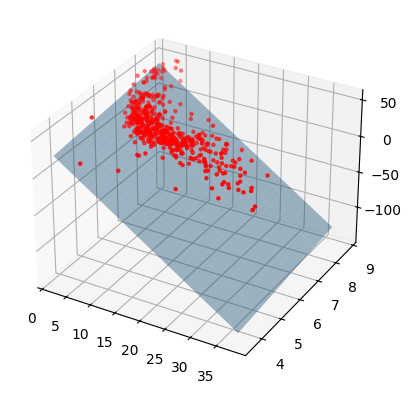

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np

x1_range = np.arange(df['LSTAT'].min(), df['LSTAT'].max())
x2_range = np.arange(df['RM'].min(), df['RM'].max())

X1, X2 = np.meshgrid(x1_range, x2_range)

plane = pd.DataFrame({'LSTAT': X1.ravel(), 'RM': X2.ravel()})
plane
pred = slr.predict(plane).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, pred, alpha=0.4)

ax.scatter3D(df['LSTAT'], df['RM'], df['MEDV'], c='r', marker= '.')
ax.init_view(elev = 10)
plt.show()